Entraînement et interprétation d'un réseau de neurones
=====

Dans ce laboratoire nous allons créer, entraîner et interpréter les résultats d'un réseau de neurone. D'abord, définissons les paramètres de notre réseau de neurones.

Comme nous allons entraîner notre réseau avec l'algorithme du gradient, il faudra utiliser la dérivée de la fonction représentant le modèle de neurone choisi. Ce serait plus facile à faire si nous avions une fonction continue au comportement relativement simple. On va donc préférer un modèle de neurone à fréquence de tir plutôt qu'un modèle de neurone à impulsion. Souvenons-nous du modèle à fréquence de tir que nous avons défini dans le TP2. La fonction associée était de la forme
$$f(x)=\left\{0\text{ pour }x<x_0,\ -\frac{1}{ln\left(1-\frac{x_0}{x}\right)}\text{ pour }x\geq x_0\right\}$$

Text(0.5, 1.0, 'f(x)')

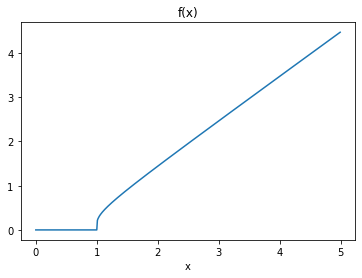

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,5,0.01)
def f(x):
    return np.piecewise(x, [x<=1, x>1], [0, lambda x: -1/np.log(1-1/x)])
y = f(x)

plt.plot(x,y)
plt.xlabel("x")
plt.title("f(x)")

Cette fonction est plutôt complexe pour nos besoins mais on peut approximer la forme de cette fonction avec la fonction beaucoup plus simple RELU. La fontion RELU est définie ainsi:
$$RELU(x)=\{0\text{ pour }x<0,\ x\text{ pour }x\geq 0\}$$

Text(0.5, 1.0, 'RELU(x)')

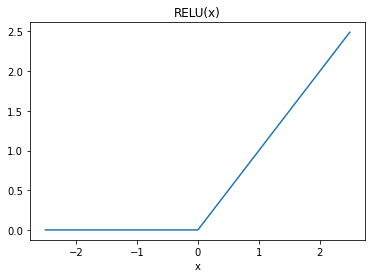

In [2]:
x = np.arange(-2.5,2.5,0.01)
def RELU(x):
    return np.piecewise(x, [x<=0, x>0], [0, lambda x: x])
y = RELU(x)

plt.plot(x,y)
plt.xlabel("x")
plt.title("RELU(x)")

On remarque que la fonction RELU est translatée vers les $x$ négatifs par rapport à la fonction pour notre neurone biologique. Cela aurait de l'importance pour un réseau basé plus strictement sur un réseau de neurone biologique, mais dans notre cas nous allons utiliser un réseau avec un haut niveau d'abstraction mathématique. L'emplacement exact du changement entre les deux parties de la fonction n'aura donc pas d'impact sur les résultats. Par convention et pour nous faciliter la vie nous mettons donc le changement de régime à $x=0$.

Maintenant que nous avons décidé d'un modèle de neurone, il faut maintenant définir la structure du réseau, c'est à dire comment les différents neurones sont connectés les uns aux autres. Nous allons choisir un modèle simple et bien connu qu'on appelle un réseau «feedforward» avec une seule couche «cachée». Les neurones de la couche cachée sont indépendants en on prend une combinaison linéaire de leurs tensions pour obtenir la sortie du réseau. On représente ce réseau dans la figure suivante.

![schema_reseau_neurones.png](schema_reseau_neurones.png)

Mathématiquement, voici comment on défini ce réseau. Soit $x$ le vecteur des données en entrée, $h$ le vecteur représentant la tension dans les neurones cachées et $o$ la sortie du réseau. Et soit $W_h$ les connections entre les canaux d'entrée et les neurones, $W_o$ les connections entre les neurones et la sortie et $\sigma$ la fonction dite d'activation des neurones (c'est à dire la fonction définissant notre modèle de neurone). Alors le réseau est défini ainsi.
$$h=\sigma(W_h x)$$
$$o=W_o h$$

Pour ce devoir, on considère la tâche suivante: On a des points $p$ dans le cercle de rayon $r=3$. On veut séparer ces points en deux catégories: les points dans le cercle $r\leq 1$ seront dans la classe $0$ et ceux dans le disque $1<r\leq 3$ dans la classe $1$. On va entraîner notre réseau à classer les points dans le bon groupe en fonction de leur position en $x$ et $y$.

Étape 1: Créez l'ensemble d'entraînement
-----

Créez un ensemble de 1000 points en coordonées cartésiennes dans un tableau numpy de taille $1000\times 2$ et créez un deuxième vecteur avec la classe de chaque point. Nommez le tableau "x" et le vecteur "y".

Étape 2: Créez le réseau de neurones
-----

Créez d'abord les matrices $W_h$ et $W_o$. Nous utiliserons trois neurones dans la couche cachée, déterminez la taille des matrices en conséquence. Vous pouvez initialiser les valeurs des poids entre $-1$ et $1$.

Créez maintenant une fonction python selon les spécifications plus haut. Retournez un objet de type dictionaire contenant le vecteur $h$ et le résultat $o$. Toutes les opérations doivent être vectorisées, c'est-à-dire que vous devez utiliser les fonctions numpy et non des boucles python. Vous pouvez utiliser la fonction RELU définie dans les instructions.

Étape 3: Créez la fonction d'entraînement
-----

Pour entraîner le réseau, il nous faut d'abord définir une fonction d'erreur. Dans notre cas nous utiliserons la fonction d'erreur quadratique moyenne. Pour un ensemble de points de catégorie $y$ et de catégorie prédite $o$, l'erreur quadratique moyenne est définie comme
$$e(y,o)=\frac{1}{n}\sum_{i=1}^n (o_i-y_i)^2$$
Écrivez cette fonction en python pour notre cas. Indice: la sortie contient un seul élément dans notre cas (ie $n=1$)

Définissez la fonction d'optimisation des poids en utilisant l'algorithme de descente du gradient. Vous devez minimiser l'erreur en fonction des poids. On veut entraîner les poids des deux matrices alors vous aurez besoin de deux fonctions. Encore une fois assurez-vous que vos fonctions sont vectorisées.

À partir de maintenant, vous avez droit aux boucles python. Nous allons entraîner notre résau pour qu'il accomplisse la tâche demandée. Lorsqu'on travaille avec un réseau de neurones, en général, on ne peut pas trouver analytiquement la fonction d'erreur. On va donc approximer cette fonction grâce à plusieurs points.

Pour chaque point de votre ensemble d'entraînement, calculez l'erreur associée au couple de données $x$, $y$. Calculez ensuite les gradients associés à ce point. Faites une moyenne de toutes les erreurs et de tous les gradients et ajustez les poids selon les gradients moyens. Utilisez la valeur $\lambda=0,02$ dans l'algorithme de descente du gradient. Ceci correspond à une époque d'entraînement. Exécutez 800 époques d'entraînement en conservant l'erreur moyenne pour chaque époque dans une liste.

Dessinez le tableau de l'erreur moyenne par époque. L'erreur devrait être strictement décroissante. Si ce n'est pas le cas, revérifiez les équations pour le gradient. On veut obtenir une erreur moyenne plus petite que $0,2$. Si votre fonction d'erreur est décroissante mais que l'erreur ne descend pas en bas de $0,2$, il se peut que le processus d'optimisation se soit simplement retrouvé coincé dans un minimum local. Réexécutez l'ensemble du code jusqu'à ce que l'erreur moyenne descende en bas de $0,2$ (vous devriez seulement avoir à réexécuter le code deux ou trois fois au maximum). Vous pouvez utiliser un seed de génération aléatoire qui fonctionne si vous le voulez.

Étape 4: Analyse du réseau
-----

Maintenant que l'on a réussi à entraîner un réseau de neurones, on aimerait comprendre comment il fonctionne. Cette étape est encore impossible pour beaucoup de réseaux plus complexes, mais pour un réseau simple comme celui-ci, on peut souvent comprendre comment la solution est implémentée.

À l'aide de la fonction coutourf de pyplot, dessinez la fonction apprise par votre réseau de neurones (ie calculez la valeur de sortie du réseau pour chaque point sur une grille). Assurez-vous de mettre en forme correctement votre graphique. Une personne lisant votre rapport devrait être capable de comprendre le graphique avec un minimum de contexte.

Dessinez maintenant les fonctions apprises par chaque neurone caché.

D'après ces graphiques, expliquez en quelques phrases comment le réseau de neurones a implémenté la tâche.